# Datasets


author: steeve.laquitaine@epfl.ch  
date: 2023.10.13  
last modified: 2023.10.13  
status:  OK
display-status: up-to-date  
regression: None  


## Setup

create and activate env from `spikeinterf..`

In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.load import load_campaign_params
from src.nodes.dataeng.silico import recording, probe_wiring
from src.nodes.prepro import preprocess
from src.nodes.truth.silico import ground_truth
from src.nodes.dataeng.lfp_only import stacking

# SETUP PARAMETERS

# silico
data_conf, param_conf_sili = get_config(
    "silico_neuropixels", "concatenated"
).values()
PREPRO_PATH = data_conf["preprocessing"]["output"]["trace_file_path_noise_0uV"]

# FIGURE SETTINGS
COLOR_VIVO = (0.7, 0.7, 0.7)
COLOR_SILI = (0.84, 0.27, 0.2)
BOX_ASPECT = 1                  # square fig
LG_FRAMEON = False              # no legend frame
FIGSIZE = (6, 25)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 24
N_MAJOR_TICKS = 6
N_MINOR_TICKS = 12
YLIM = [1e-7, 1e10]
savefig_cfg = {"transparent":True}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}

2024-05-08 11:08:42,762 - root - utils.py - get_config - INFO - Reading experiment config.
2024-05-08 11:08:42,799 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Preprocessed traces

In [2]:
# get preprocessed
Recording = si.load_extractor(PREPRO_PATH)

layers = Recording.get_property("layers")

col1_site_out = np.where(layers[:96] == "Outside")[0]
col1_site_l1 = np.where(layers[:96] == "L1")[0]
col1_site_l2_3 = np.where((layers[:96] == "L2") | (layers[:96] == "L3"))[0]
col1_site_l4 = np.where(layers[:96] == "L4")[0]
col1_site_l5 = np.where(layers[:96] == "L5")[0]
col1_site_l6 = np.where(layers[:96] == "L6")[0]

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/binaryrecordingextractor.py:78: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


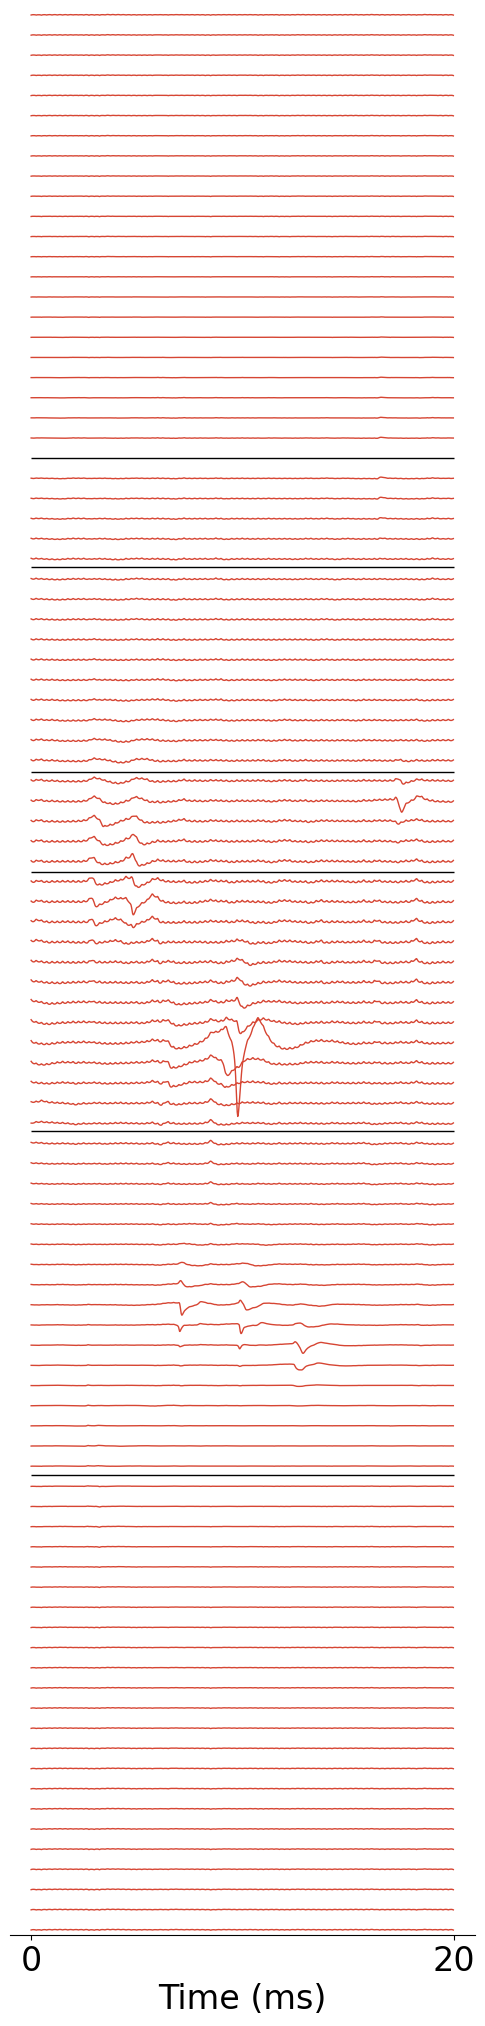

In [3]:
# takes 5 secs

# plot
NUM = 1400  # 1400, 76, 1200, 10, 14, 46, 53, 61, 500,
SAMPFREQ = 40000  # hz
LINEWIDTH = 1
PLOT_Y_PITCH = 20 * 2
DURATION = 20  # 20  # in ms, 46
n_timepoints = int(DURATION * SAMPFREQ / 1000)
PERIOD = np.arange((NUM - 1) * n_timepoints, NUM * n_timepoints, 1)
Y_MAX = PLOT_Y_PITCH * 95

prep_traces = Recording.get_traces()
n_contacts = prep_traces.shape[1]

# plot 384 contacts x 5 ms (like Trautmann et al 2023)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
for contact_i in np.arange(0, 96, 1):
    # mark the first trace of each layer
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.98 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # layer 2
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # layer 1
    if contact_i == col1_site_l1[0]:
        ax.hlines(
            y=0.98 * pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1
        )

    # Outside
    if contact_i == 73:
        ax.hlines(y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=1)

    # all other traces
    else:
        ax.plot(
            prep_traces[PERIOD, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_SILI,
        )
    pos_up += PLOT_Y_PITCH

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, 20])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-10, Y_MAX + 10])
plt.yticks([])

# save figures
plt.savefig(
    "figures/2_realism/2_dynamics/pdf/marques/silico_marques_40m_noise_0uV_dynamics.pdf",
    **savefig_cfg
)
plt.savefig(
    "figures/2_realism/2_dynamics/svg/marques/silico_marques_40m_noise_0uV_dynamics.svg",
    **savefig_cfg
)

Zoom in on a single-electrode spike

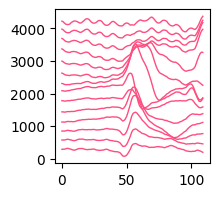

In [20]:
# get preprocessed
Recording = preprocess.load(data_conf)
prep_traces = Recording.get_traces()

# plot
LINEWIDTH = 1
Y_STEP = 300

n_contacts = prep_traces.shape[1]

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
SAMPFREQ = 40000  # hz
duration = 20  # in ms
n_timepoints = int(duration * SAMPFREQ / 1000)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
pos_up = 0
row = 0
for contact_i in np.arange(20, 34, 1):
    row += 1
    pos_up += Y_STEP
    ax.plot(
        prep_traces[120:230, contact_i] + pos_up,
        linewidth=LINEWIDTH,
        color=[1, 0.3, 0.5],
    )

# save figures
# plt.savefig("figures/2_realism/0_recordings/pdf/single_spike_panel_col1.pdf")
# plt.savefig("figures/2_realism/0_recordings/svg/single_spike_panel_col1.svg")

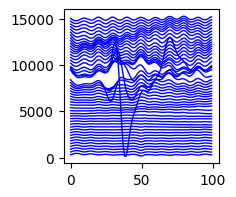

In [21]:
# get preprocessed
Recording = preprocess.load(data_conf)
prep_traces = Recording.get_traces()

# plot
LINEWIDTH = 1
Y_STEP = 300

n_contacts = prep_traces.shape[1]

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
SAMPFREQ = 40000  # hz
duration = 20  # in ms
n_timepoints = int(duration * SAMPFREQ / 1000)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
pos_up = 0
row = 0
for contact_i in np.arange(300, 350, 1):
    row += 1
    pos_up += Y_STEP
    ax.plot(prep_traces[:100, contact_i] + pos_up, linewidth=LINEWIDTH, color="blue")

# save figures
plt.savefig("figures/2_realism/0_recordings/pdf/single_spike_panel_col4.pdf")
plt.savefig("figures/2_realism/0_recordings/svg/single_spike_panel_col4.svg")

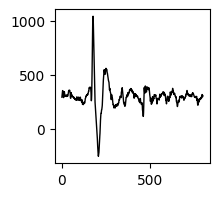

In [32]:
# get preprocessed
Recording = preprocess.load(data_conf)
prep_traces = Recording.get_traces()

# plot
LINEWIDTH = 1
Y_STEP = 300

n_contacts = prep_traces.shape[1]

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
SAMPFREQ = 40000  # hz
duration = 20  # in ms
n_timepoints = int(duration * SAMPFREQ / 1000)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
pos_up = 0
row = 0
for contact_i in np.arange(23, 24, 1):
    row += 1
    pos_up += Y_STEP
    ax.plot(
        prep_traces[:n_timepoints, contact_i] + pos_up,
        linewidth=LINEWIDTH,
        color="black",
    )

# save figures
plt.savefig("figures/2_realism/0_recordings/pdf/single_channel.pdf")
plt.savefig("figures/2_realism/0_recordings/svg/single_channel.svg")

### Plot only contacts inside circuit

contacts inside circuit (ids) are:

* [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 
 
 * 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 
 
 * 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 
 
 * 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360]

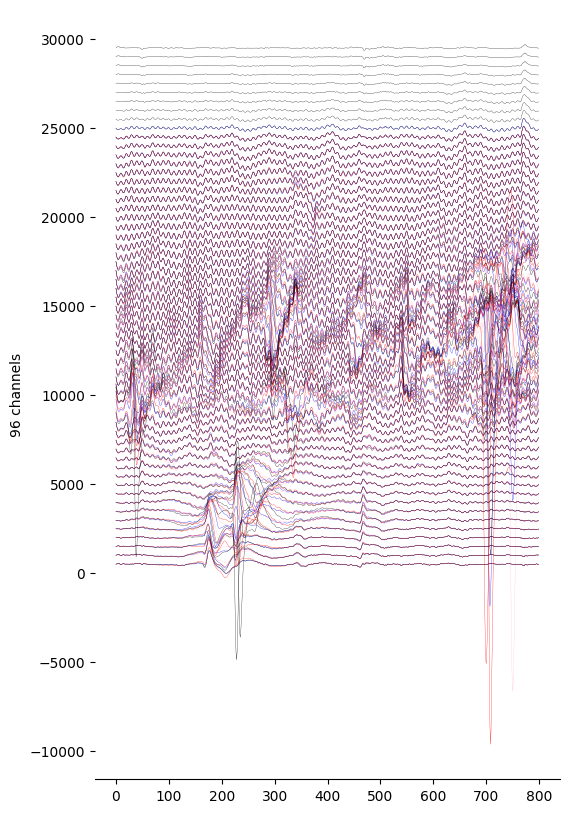

In [11]:
# get preprocessed
Recording = preprocess.load(data_conf)
prep_traces = Recording.get_traces()

# plot
LINEWIDTH = 0.2
Y_STEP = 500

n_contacts = prep_traces.shape[1]

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
SAMPFREQ = 40000  # hz
duration = 20  # in ms
n_timepoints = int(duration * SAMPFREQ / 1000)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=(6, 10))
pos_up = 0
row = 0
for contact_i in np.arange(23, 72, 1):
    row += 1
    pos_up += Y_STEP
    ax.plot(
        prep_traces[:n_timepoints, contact_i] + pos_up,
        linewidth=LINEWIDTH,
        color="pink",
    )
ax.set_ylabel("96 channels")

# plot (97: bottom 192:top)
pos_up = 0
row = 0
for contact_i in np.arange(118, 168, 1):
    row += 1
    pos_up += Y_STEP
    ax.plot(
        prep_traces[:n_timepoints, contact_i] + pos_up,
        linewidth=LINEWIDTH,
        color="blue",
    )

# plot (193: bottom 288:top)
pos_up = 0
row = 0
for contact_i in np.arange(215, 264, 1):
    row += 1
    pos_up += Y_STEP
    ax.plot(
        prep_traces[:n_timepoints, contact_i] + pos_up, linewidth=LINEWIDTH, color="red"
    )

# plot (289: bottom 384:top)
pos_up = 0
row = 0
for contact_i in np.arange(310, 369, 1):
    row += 1
    pos_up += Y_STEP
    ax.plot(
        prep_traces[:n_timepoints, contact_i] + pos_up,
        linewidth=LINEWIDTH,
        color="black",
    )

ax.spines[["left", "right", "top"]].set_visible(False)